In [1]:
import seaborn as sns 
import importlib
import SFFI.util_plot as ut 
import matplotlib.pyplot as plt
from script_figure import plot_error_and_accuracy
from script_figure import plot_time_vs_key
from _helper._load_csv import aggreagate_csv_from_cluster
from script_figure import plot_trajectory
from simulation_models import lorenz, Ornstein_Uhlenbeck, lotka_volterra
import os
from script_figure import labels_plot
import script_figure.helper_figure as hf
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
importlib.reload(ut)
    
ut.set_favorite_plot_config()
plt.rcParams['figure.dpi'] = 1000
aggreagate_csv_from_cluster(select_file="lorenz", path=os.path.abspath('') + "/csv")
aggreagate_csv_from_cluster(select_file="Orn", path=os.path.abspath('') + "/csv")
aggreagate_csv_from_cluster(select_file="Lot", path=os.path.abspath('') + "/csv")
model_class = lorenz.Lorenz
model_class_OU = Ornstein_Uhlenbeck.OrnsteinUhlenbeck
model_class_Lotka = lotka_volterra.LotkaVolterra

Look in  /home/andonis/These/Jupyter/PASTIS_PRL_github/csv
['lotka_volterra_dim_7_n.pkl', 'OrnsteinUhlenbeck_repulsive_gaussian_n.pkl', 'OrnsteinUhlenbeck_repulsive_gaussian_diffusion_strength.pkl', 'large_deviation_dim_8.pkl', 'large_deviation_dim_3.pkl', 'large_deviation_dim_6.pkl', 'OrnsteinUhlenbeck_dim_10_n.pkl', 'lotka_volterra_dim_7_benchmark_sindy_n.pkl', 'lorenz_critical_constant_noise_p_n.pkl', 'Misspecified_model_figure_1_diffusion_strength.pkl', 'lotka_volterra_dim_7_p_n.pkl', 'grayscott_dt.pkl', 'OrnsteinUhlenbeck_p_dim_10_n.pkl', 'grayscott_n.pkl', 'grayscott_p_n.pkl', 'grayscott_diffusion_strength.pkl', 'lorenz_critical_constant_noise_n.pkl', 'lorenz_critical_constant_noise_experimental_noise.pkl', 'lorenz_critical_constant_noise_diffusion_vs_time_diffusion_strength.pkl', 'lotka_volterra_dim_7_diffusion_strength.pkl', 'lorenz_critical_constant_noise_dt.pkl', 'large_deviation_dim_7.pkl', 'large_deviation_dim_9.pkl', 'large_deviation_dim_10.pkl', 'large_deviation_dim_5.pkl

[Errno 2] No such file or directory: 'lorenz_critical_constant_noise_dt.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/lorenz_critical_constant_noise_dt.pkl'
{'dt': 0.003, 'time': 10, 'base_infered': [3, 5, 7, 9, 11, 17, 22], 'real_base': [3, 5, 7, 9, 11, 17, 22], 'error': 1.0305862477733706e-05, 'method': 'Real_model_Ito_trapeze_large_dt_A_True_diffusion_Multiplicative_time_correction', 'type_D': 'constant', 'D_strength': 100, 'experimental_noise': 0, 'ratio_error_real_model': 1.0, 'predictive_error': 9.238044126111216e-06, 'ratio_error_real_model_predictive': 1.0, 'SBR_finds_real_model': False, 'real_model_on_pareto_front': False, 'SBR_found_better_minimum': False, 'init_params': {'r': 28.0, 'b': 2.3333333333333335, 's': 10.0, 'diffusion_constant': True, 'kwargs': {'diffusion_strength': 100, 'dt': 0.0002, 'n': 20000000}}, 'TP': 1.0, 'FP': 0.0, 'FN': 0.0, 'Exact_model_found': 1, 'Accuracy_model': 1.0, 'SBR_pareto_found': False}
3 0.2 {}
[Errno 2] No such fi

[None]

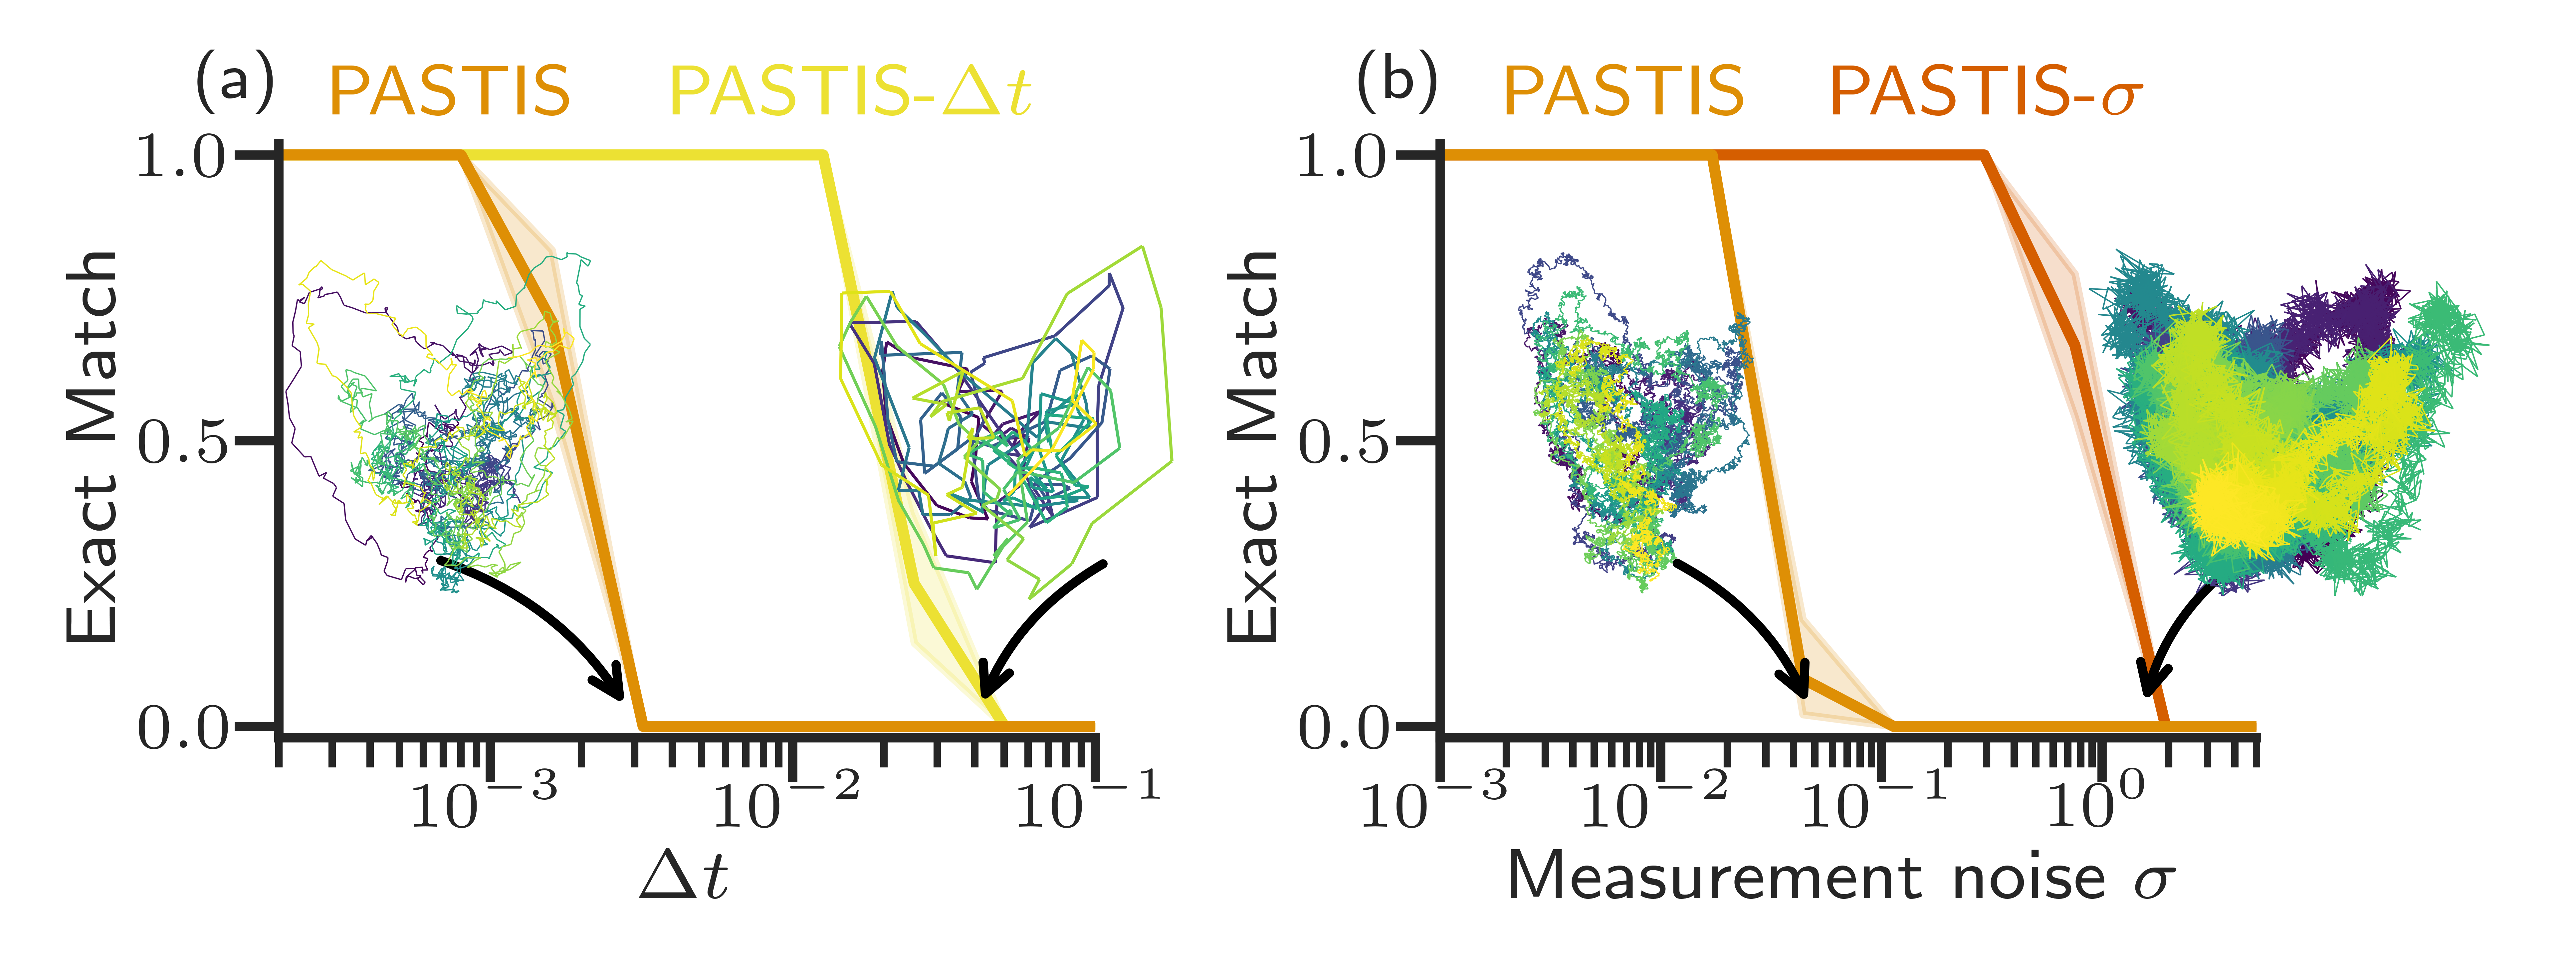

In [2]:
importlib.reload(labels_plot)
# importlib.reload(hf)
#import pylustrator
#pylustrator.start()

ut.set_favorite_plot_config()
l_y_plot = ["Exact_model_found"] #["error"] #
name_csv_noise = "lorenz_critical_constant_noise_experimental_noise.pkl"
name_csv_dt = "lorenz_critical_constant_noise_dt.pkl"
method_to_plot_noise = ["PASTIS", "PASTIS-$\sigma$"]
method_to_plot_dt = ["PASTIS", "PASTIS-$\Delta t$"]

n_rows, n_cols = 1, 2
fig = plt.figure(figsize=ut.set_size(width="article", fraction=1, subplots=(n_rows, n_cols), scale_height=1.3), layout="constrained")
gs = fig.add_gridspec(nrows=n_rows, ncols=n_cols)
ax_2 = fig.add_subplot(gs[0, 0])
ax_1 = fig.add_subplot(gs[0, 1])

rd_arrow = 0.2
pos_up_insert_ax = 0.
top_pos_arrow = 0.3

size_insert_plot = 0.9


#### dt ####
arrowprops = dict(arrowstyle="->", connectionstyle="arc3,rad=-%s"%rd_arrow, lw=1, color="black")
inset_ax = inset_axes(ax_2, width="70%", height="70%", bbox_to_anchor=(-0.35, pos_up_insert_ax, size_insert_plot, size_insert_plot), bbox_transform=ax_2.transAxes)
parameter_value_plot = 0.003
plot_trajectory.plot_trajectory_Lorenz_simple(name_csv_dt, model_class, ax=inset_ax, parameter="dt", parameters_value_plot=[parameter_value_plot], width=0.2, time_max=10, add_title=False)
ax_2.annotate('', xy=(parameter_value_plot, 0.01), xytext=(parameter_value_plot/5, top_pos_arrow), arrowprops=arrowprops)

inset_ax = inset_axes(ax_2, width="60%", height="70%", bbox_to_anchor=(0.3, pos_up_insert_ax, size_insert_plot, size_insert_plot), bbox_transform=ax_2.transAxes)
parameter_value_plot = 0.04
arrowprops["connectionstyle"] = "arc3,rad=%s"%rd_arrow
plot_trajectory.plot_trajectory_Lorenz_simple(name_csv_dt, model_class, ax=inset_ax, parameter="dt", parameters_value_plot=[parameter_value_plot], width=0.4, time_max=10, add_title=False)
ax_2.annotate('', xy=(parameter_value_plot, 0.01), xytext=(parameter_value_plot*3, top_pos_arrow), arrowprops=arrowprops)

plot_error_and_accuracy.plot_from_csv(name_csv_dt, 
                                    parameter="dt",
                                    method_to_plot=method_to_plot_dt,
                                    l_y_plot=l_y_plot,
                                    axs=[ax_2],
                                    verbose=True,
                                    add_legend_on_line=True,
                                    #legend=False
                                    )

### Measuremnt noise #####
arrowprops = dict(arrowstyle="->", connectionstyle="arc3,rad=-%s"%rd_arrow, lw=1, color="black")
inset_ax = inset_axes(ax_1, width="60%", height="70%", bbox_to_anchor=(-0.35, pos_up_insert_ax, size_insert_plot, size_insert_plot), bbox_transform=ax_1.transAxes)
parameter_value_plot = 0.05
ax = plot_trajectory.plot_trajectory_Lorenz_simple(name_csv_noise, model_class, ax=inset_ax, parameter="experimental_noise", parameters_value_plot=[parameter_value_plot], width=0.2, time_max=10, add_title=False)
ax_1.annotate('', xy=(parameter_value_plot, 0.01), xytext=(parameter_value_plot/5, top_pos_arrow), arrowprops=arrowprops)

inset_ax = inset_axes(ax_1, width="60%", height="70%", bbox_to_anchor=(0.45, pos_up_insert_ax, size_insert_plot, size_insert_plot), bbox_transform=ax_1.transAxes)
parameter_value_plot = 1.5
arrowprops["connectionstyle"] = "arc3,rad=%s"%rd_arrow
ax = plot_trajectory.plot_trajectory_Lorenz_simple(name_csv_noise, model_class, ax=inset_ax, parameter="experimental_noise", parameters_value_plot=[parameter_value_plot], width=0.2, time_max=10, add_title=False)
ax_1.annotate('', xy=(parameter_value_plot, 0.01), xytext=(parameter_value_plot*3, top_pos_arrow), arrowprops=arrowprops)

plot_error_and_accuracy.plot_from_csv(name_csv_noise, 
                                    parameter="experimental_noise",
                                    method_to_plot=method_to_plot_noise,
                                    l_y_plot=l_y_plot,
                                    axs=[ax_1],
                                    verbose=True,
                                    add_legend_on_line=True,
                                    )

hf.add_letter(ax_1, "b", x=-0.1)
hf.add_letter(ax_2, "a", x=-0.1)

plt.figure(1).axes[0].texts[3].set(position=(0.0003, 1.1))
plt.figure(1).axes[0].texts[2].set(position=(0.004, 1.1))

plt.figure(1).axes[1].texts[3].set(position=(0.002, 1.1))
plt.figure(1).axes[1].texts[2].set(position=(0.06, 1.1))

#plt.savefig("figures/lorenz_imperfect_data.png", dpi=1000, bbox_inches='tight')